### Background

An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. 

The design team of the company has created a new landing page. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. 

### Objective:

Statistical analysis of business data. Explore the dataset and extract insights from the data.

(1) Explore the dataset and extract insights using Exploratory Data Analysis.

(2) Do the users spend more time on the new landing page than the old landing page?

(3) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

(4) Does the converted status depend on the preferred language? 

(5) Is the mean time spent on the new page same for the different language users?

*Considering a significance level of 0.05 for all tests

### Data Dictionary:

* user_id - This represents the user ID of the person visiting the website.
* group - This represents whether the user belongs to the first group (control) or the second group (treatment).
* landing_page - This represents whether the landing page is new or old.
* time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
* converted - This represents whether the user gets converted to a subscriber of the news portal or not.
* language_preferred - This represents the language chosen by the user to view the landing page.


In [20]:
# importing necessary libraries 

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

In [21]:
# reading data into dataframe

data = pd.read_csv("abtest.csv")
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [3]:
# shape of the dataset, missing values

print(data.shape, "\n")
print(data.isnull().sum())

(100, 6) 

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


* The dataset contains 100 rows and 6 columns. The dataset does not contain any missing values.

In [22]:
# information about columns in dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


* user_id, time_spent_on_the_page are numerical 
* group, landing page, converted and language_preferred are categorical

In [5]:
print(data["time_spent_on_the_page"].describe())
data.astype("object").describe()

count    100.000000
mean       5.377800
std        2.378166
min        0.190000
25%        3.880000
50%        5.415000
75%        7.022500
max       10.710000
Name: time_spent_on_the_page, dtype: float64


,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100,100,100,100.00,100,100
unique,100,2,2,94.00,2,3
top,546560,treatment,old,5.86,yes,French
freq,1,50,50,2.00,54,34


* Mean & median time spent on the page are approximately equal, implying, negligible skewness.
* There are two groups (control and treatment), two landing pages (old and new), each associated with 50 users.
* Users prefer 3 different languages - english, french and spanish.

### (1) Explore the dataset and extract insights using Exploratory Data Analysis.

### Time spent on the landing pages - univariate and bivariate analysis 

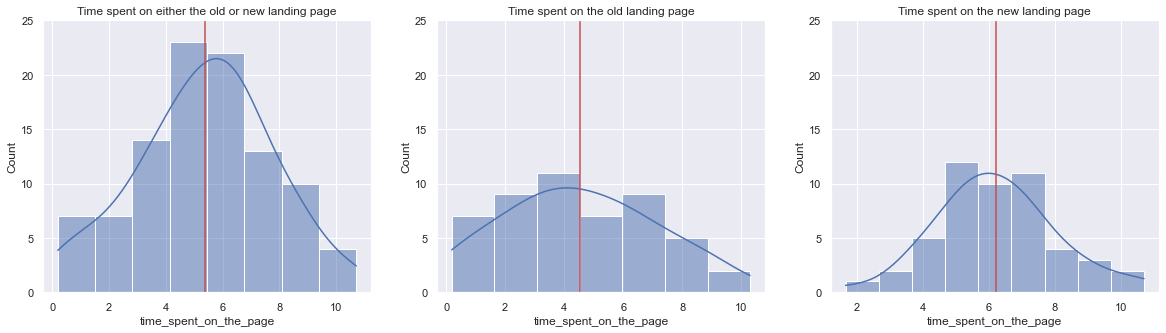

Total & average time spent on the old landing page across 50 users (control group):  226.62 mins and 4.53 mins.
Total & average time spent on the new landing page across 50 users (treatment group):  311.16 mins and 6.22 mins.


In [23]:
fig,ax = plt.subplots(1,3, figsize=(20,5))

sns.histplot(data["time_spent_on_the_page"], ax=ax[0], kde = True);
ax[0].set_ylim((0,25))
ax[0].axvline(data["time_spent_on_the_page"].mean(), c = "r")
ax[0].set_title("Time spent on either the old or new landing page")


data_old = data[ data["landing_page"] == "old" ]
sns.histplot(data_old["time_spent_on_the_page"], ax=ax[1], kde = True);
ax[1].set_ylim((0,25))
ax[1].axvline(data_old["time_spent_on_the_page"].mean(), c = "r")
ax[1].set_title("Time spent on the old landing page")

data_new = data[ data["landing_page"] == "new"]
sns.histplot(data_new["time_spent_on_the_page"], ax=ax[2], kde = True);
ax[2].set_ylim((0,25))
ax[2].axvline(data_new["time_spent_on_the_page"].mean(), c = "r")
ax[2].set_title("Time spent on the new landing page")
plt.show()

print("Total & average time spent on the old landing page across 50 users (control group): ", \
      str(round(data_old["time_spent_on_the_page"].sum(), 2))+ " mins and", \
      str(round(data_old["time_spent_on_the_page"].mean(), 2))+ " mins.")

print("Total & average time spent on the new landing page across 50 users (treatment group): ", \
      str(round(data_new["time_spent_on_the_page"].sum(), 2))+ " mins and", \
      str(round(data_new["time_spent_on_the_page"].mean(), 2))+ " mins.")

* Data for time spent on the new landing page appears to follow a normal distribution.
* It appears that time spent on the new landing page follows a more normal distribution than time spent on the old landing page. Total (across all users) and average time spent on the new landing page is higher than on the old landing page.

### Conversion rate (the proportion of users who visit the landing page and get converted) - bivariate analysis

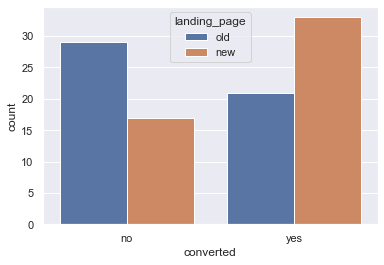

% converted - old landing page:  42.0%
% converted - new landing page:  66.0%


In [24]:
sns.countplot(x="converted", data=data, hue="landing_page");
plt.show()

print("% converted - old landing page: ", \
      str((data_old[data["converted"]=="yes"].count()["group"]/50)*100)+"%" )

print("% converted - new landing page: ", \
      str((data_new[data["converted"]=="yes"].count()["group"]/50)*100)+"%" )

* % conversion rate is higher for new landing page (66%) when compared to old landing page (42%).

### Relationship between conversion rate, preferred language and landing pages  - bivariate and multivariate analysis

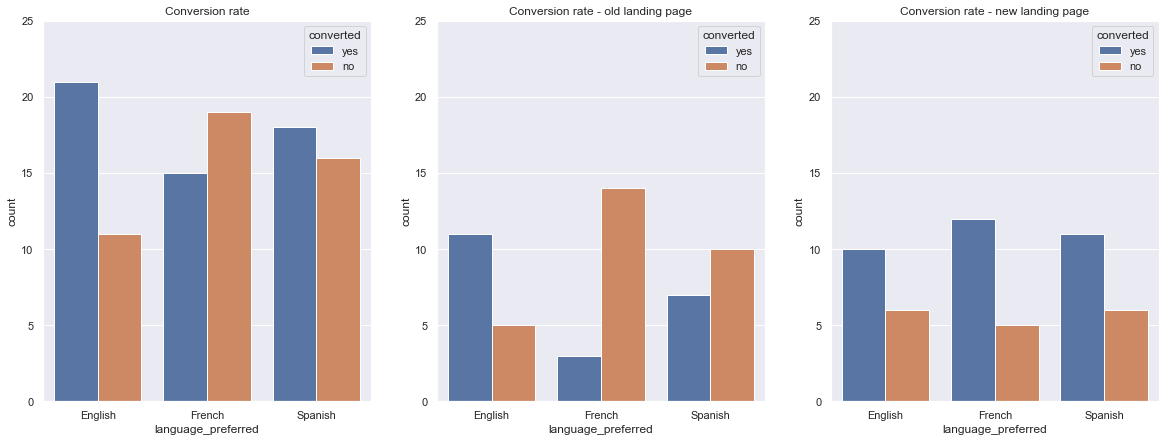

Number of users that prefer English, French and Spanish in the dataset are 32, 34, and 34.

% change in converted - new landing page vs old landing page:
language_preferred
English   -10.00
French     75.00
Spanish    36.36
Name: user_id, dtype: float64


In [31]:
fig,ax = plt.subplots(1,3, figsize=(20,7))

sns.countplot(x="language_preferred", data=data.sort_values("language_preferred", ascending = True), \
              hue="converted", ax=ax[0]);
ax[0].set_ylim((0,25))
ax[0].set_title("Conversion rate")

sns.countplot(x="language_preferred", data=data_old.sort_values("language_preferred", ascending = True), \
              hue="converted", ax=ax[1]);
ax[1].set_ylim((0,25))
ax[1].set_title("Conversion rate - old landing page")

sns.countplot(x="language_preferred", data=data_new.sort_values("language_preferred", ascending = True), \
              hue="converted", ax=ax[2]);
ax[2].set_ylim((0,25))
ax[2].set_title("Conversion rate - new landing page")

plt.show()

print("Number of users that prefer English, French and Spanish in the dataset are",  \
      str(data.groupby("language_preferred").count()["user_id"]["English"])+",", \
      str(data.groupby("language_preferred").count()["user_id"]["French"])+", and", \
      str(data.groupby("language_preferred").count()["user_id"]["Spanish"])+"." +"\n")

data_new_converted = data_new[data["converted"]=="yes"]
data_old_converted = data_old[data["converted"]=="yes"]

print("% change in converted - new landing page vs old landing page:")

print(round(100*(data_new_converted.groupby("language_preferred").count()["user_id"] \
    - data_old_converted.groupby("language_preferred").count()["user_id"])/data_new_converted.groupby \
("language_preferred").count()["user_id"], 2))
      

* There are approximately equal number of English, French and Spanish preferring users (32, 34 and 34) in the dataset.
* % change in conversion for new landing page vs. old landing page is -10% for english. This means users that prefer English, converted marginally more when on the older landing page.
* % change in conversion for new landing page vs. old is 75% for French and 36.36% for Spanish. Users that prefer these languages, hence, converted more when on the new landing page. Conversion on the new landing page is very strong among users prefering French.

### Relationship between time spent on the landing pages, and preferred language - bivariate and multivariate analysis

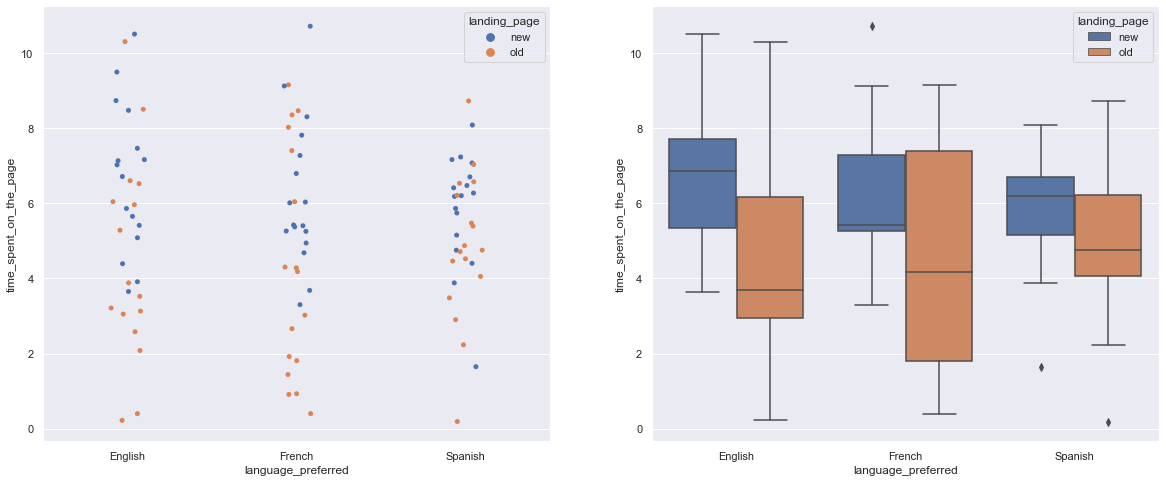

Average time spent on the new landing page by preferred language:
language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


In [32]:
fig,ax = plt.subplots(1,2, figsize=(20,8))
sns.stripplot(x="language_preferred", y="time_spent_on_the_page",\
              data=data.sort_values("language_preferred", ascending = True), \
              hue="landing_page", jitter=True, ax=ax[0]);
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", \
            data=data.sort_values("language_preferred", ascending = True), \
            hue="landing_page", ax=ax[1]);
plt.show()
print("Average time spent on the new landing page by preferred language:")
print(data_new.groupby("language_preferred").mean()["time_spent_on_the_page"])

* The median time spent on the new landing page are significantly more than old landing page for all users irrespective of preferred language.
* The mean time spent on the new landing page are 6.66mins, 6.19mins and 5.83 mins for users that speak English, French and Spanish. Further statistical testing needs to be performed to check if the variance is within language groups or in between language groups.

### Statistical Analysis - using level of significance as 5%

### (2) Do the users spend more time on the new landing page than the old landing page?

* H0 : Null Hypothesis - The mean time spent on the new landing page is the same as the mean time spent on the old landing page.
* Ha : Alternate Hypothesis - The mean time spent on the new landing page is higher than the mean time spent on the old landing page.

Let μ1 and μ2 be the mean times spent on the new and old landing pages. 
* H0 : μ1 = μ2
* Ha : μ1 > μ2

In [10]:
μ1, μ2 = data_new["time_spent_on_the_page"].mean() , data_old["time_spent_on_the_page"].mean()
std1, std2 = data_new["time_spent_on_the_page"].std() , data_old["time_spent_on_the_page"].std()
print("μ1, μ2, std1, std2:", str(round(μ1,2))+",", str(round(μ2,2))+",", str(round(std1,2))+","\
      , str(round(std2,2))+".")

μ1, μ2, std1, std2: 6.22, 4.53, 1.82, 2.58.


* Continuous data - Yes, the time spent on landing pages is measured on a continuous scale.
* Normally distributed populations - Looking at the histogram probability density curves, as well as considering larger sample sizes of 50 (>i.e., 30), normal distribution assumption holds.
* Independent populations - As we are taking random samples from population for two different groups, the two samples are assumed to be independent.
* Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.

#### Two Independent Sample T-test for Equality of Means - Unequal Std Dev

In [11]:
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(data_new["time_spent_on_the_page"], data_old["time_spent_on_the_page"], \
                     equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


#### Insight:
As the p-value (~0.00014) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that mean time spent on the new landing page is higher than mean time spent on the old landing page.

### (3) Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

* H0 : Null Hypothesis - The conversion rate (the proportion of users who visit the landing page and get converted) for the new page is the same as the conversion rate for the old page.
* Ha : Alternate Hypothesis - The conversion rate for the new page is greater than the conversion rate for the old page.

Let p1 and p2 be the conversion rates for the new and old landing pages. 
* H0 : p1 = p2
* Ha : p1 > p2

The formulated hypotheses are concerned with proportions. A test of proportions can be used to analyse the hypotheses and draw a conclusion. We shall use a Proportions Z test for this problem.

In [12]:
convertedn_new = float(data_new[data["converted"]=="yes"].count()["group"])
p1 = float(round(convertedn_new/50, 2))
convertedn_old = float(data_old[data["converted"]=="yes"].count()["group"])
p2 = float(round(convertedn_old/50, 2))

print(f'The conversion rates for new landing page and old landing page are {p1} and {p2} respectively.')

The conversion rates for new landing page and old landing page are 0.66 and 0.42 respectively.


The proportions in the sample are larger for the new landing page. Let's conduct the test to see if this is significant.

#### Two Proportion Z-test

In [13]:
from statsmodels.stats.proportion import proportions_ztest
stat, pval = proportions_ztest([convertedn_new, convertedn_old], [50, 50], alternative = 'larger')

# print the p-value
print('The p-value is '+ str(pval))

The p-value is 0.008026308204056278


#### Insight:
As the p-value (~0.008) is less than the level of significance, we can reject the null hypothesis. Hence, we do have enough evidence to support the claim that conversion rate for the new landing page is higher than conversion rate for the old landing page.

### (4) Does the converted status depend on the preferred language?

#### Create a contingency table using the pandas.crosstab() function

In [14]:
lang_conv = pd.crosstab(data.converted, data.language_preferred).rename_axis(None,axis=1).reset_index()
lang_conv

,converted,English,French,Spanish
0,no,11,19,16
1,yes,21,15,18


* H0 : Null Hypothesis - Converted status is independent of the preferred language.
* Ha : Alternate Hypothesis - Converted status is dependent on the preferred language.

Let's test whether the assumptions are satisfied or not
* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

#### Chi-Square Test for Independence

In [15]:
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(lang_conv.drop('converted', axis = 1))
print('The p-value is', p_value)

The p-value is 0.21298887487543447


#### Insight:
As the p-value (~0.21) is more than the level of significance, we can not reject the null hypothesis. Hence, we do not have enough evidence to support the claim that conversion rate is dependent on the preferred language.

### (5) Is the mean time spent on the new page same for the different language users?

Let  μ1,  μ2,  μ3 be the mean time spent on the new landing page for the different language users - English, French and Spanish respectively.

* H0:  μ1 =  μ2 = μ3
* Ha: Atleast one of  μ1,  μ2, or  μ3 is different from the rest

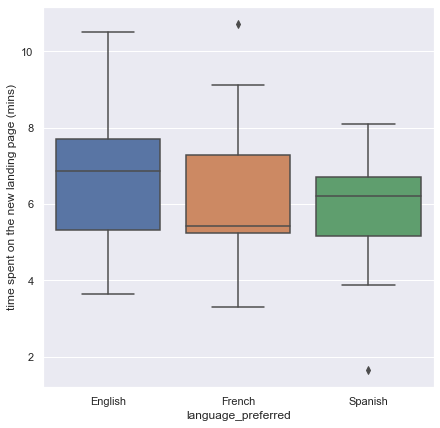

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(x="language_preferred", y="time_spent_on_the_page",\
            data=data_new.sort_values("language_preferred", ascending = True));
plt.ylabel("time spent on the new landing page (mins)")
plt.show()

Now, the normality and equality of variance assumptions need to be checked. 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

* For equality of variance, Levene's test is applied to the response variable.

#### Shapiro-Wilk’s test

* H0: Time spent on the new landing page follows a normal distribution
* Ha: Time spent on the new landing page does not follow a normal distribution

In [17]:
# find the p-value
w, p_value = stats.shapiro(data_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


#### Insight:
Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

#### Levene’s test

* H0: All population variances (time spent on new landing page for different preferred languages) are equal.
* Ha: Atleast one variance is different from the rest.

In [18]:
from scipy.stats import levene
statistic, p_value = levene( data_new['time_spent_on_the_page'][data_new['language_preferred']=="English"], 
                             data_new['time_spent_on_the_page'][data_new['language_preferred']=="French"], 
                             data_new['time_spent_on_the_page'][data_new['language_preferred']=="Spanish"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

#### One-way ANOVA Test

In [19]:
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(data_new.loc[data_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              data_new.loc[data_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              data_new.loc[data_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


#### Insight: 
As the p-value (~0.43) is much more than the significance level, we fail to reject the null hypothesis. Hence, we do not have enough statistical significance to conclude that at least one mean time spent on the new landing page for diferrent preferred languages is different from the rest at 5% significance level.

### Summary

#### Exploratory Data Analysis

* Total (across all users) and average time spent on the new landing page (311.16 & 6.22 mins) is higher than on the old landing page (226.62 & 4.53 mins).
* % conversion rate is higher for new landing page (66%) when compared to old landing page (42%).
* There are apporximately equal number of English, French and Spanish preferring users (32, 34 and 34) in the dataset. % change in conversion for new landing page vs. old landing page is -10% for English, 75% for French and 36.36% for Spanish. Conversion when on the new landing page is very strong among users prefering French and marginally poor for users prefering English. 
* The median time spent on the new landing page are significantly more than old landing page for all users irrespective of preferred language. The mean time spent on the new landing page are 6.66mins, 6.19mins and 5.83 mins for users that speak English, French and Spanish (~approximately equal).

#### Statistical Analysis

* We statistically found enough evidence to support the claim that mean time spent on the new landing page is higher than mean time spent on the old landing page using a two independent sample T-test for equality of means - unequal std dev.
* We statistically found enough evidence to support the claim that conversion rate for the new landing page is higher than conversion rate for the old landing page using a two proportion Z-test.
* We did not find enough evidence to support the claim that conversion rate is dependent on the preferred language using a chi-square test for independence. 
* We did not find enough statistical significance to conclude that at least one mean time spent on the new landing page for different preferred languages is different from the rest at 5% significance level using One-way ANOVA Test. Normality and equality of variances assumptions for ANOVA were tested using Shapiro-Wilk’s test and Levene’s test respectively.

### Recommendations

* The new landing page was found to be statistically better in time spent by users on the page as well as the conversion rate of a user as a subscriber when compared to the old landing page. Hence, the new landing page is effective from business standpoint.


* While we did not find enough statistical evidence from the dataset that conversion rate is dependent on the preferred language, exploratory data analysis of the dataset revealed that French and Spanish preferring users had a higher conversion rate on new landing page while English preferring users had a marginally poorer conversion rate on the new landing page. Also, did not find enough statistical significance to conclude that at least one of the mean time spent on the new landing page for different preferred languages is different from the rest (at 5% significance level or 95% confidence). - This needs to be communicated to the design team as it appears even though mean time spent by English preferring users on the new landing page is higher than old landing page, and similar to the Spanish and French preferring users, conversion rate was marginally poorer on the new landing page. Requires further data gathering and investigation.


